In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from openpmd_viewer import OpenPMDTimeSeries

In [2]:
ts = OpenPMDTimeSeries('/tmp/02_fluid_ions/hdf5')

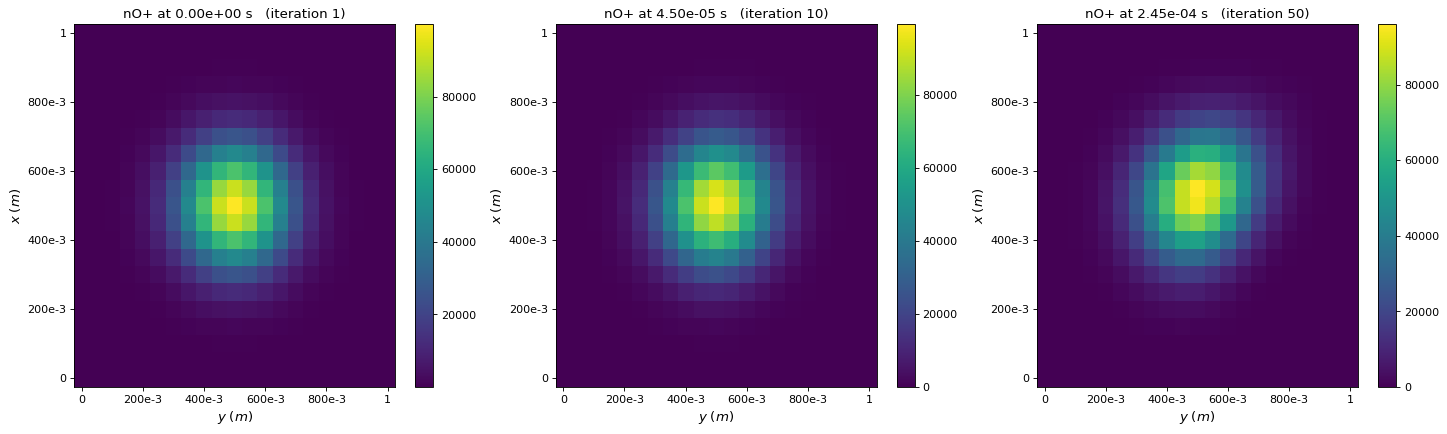

In [3]:
fig = plt.figure(figsize=(22, 6), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(1, 3, 1); ts.get_field("nO+", iteration=1, plot=True);
plt.subplot(1, 3, 2); ts.get_field("nO+", iteration=10, plot=True);
plt.subplot(1, 3, 3); ts.get_field("nO+", iteration=50, plot=True);

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Plot the blue phase space with all the electrons
ts.get_particle( ['id', 'x', 'y'], species='e-', iteration=10, plot=True)
x_selected, y_selected = ts.get_particle( ['x', 'y'], species='e-', 
                            iteration=101, select={'id':[1,1]} )
plt.plot(x_selected, y_selected, 'g.')
plt.xlabel('x')
plt.ylabel('y')

In [ ]:
from openpmd_viewer import ParticleTracker
# Select particles to be tracked, at iteration 200
pt = ParticleTracker( ts, iteration=200, select={'id':[0,1]}, species='e-', preserve_particle_index=True)
N_iterations = len(ts.iterations)
N_particles = pt.N_selected

x_trajectories  = np.empty( ( N_iterations, N_particles ) )
y_trajectories  = np.empty( ( N_iterations, N_particles ) )
ux_trajectories = np.empty( ( N_iterations, N_particles ) )
uy_trajectories = np.empty( ( N_iterations, N_particles ) )
for i in range( N_iterations ):
    x, y, ux, uy = ts.get_particle( ['x', 'y', 'ux', 'uy'], select=pt, iteration=ts.iterations[i], species='e-' )
    x_trajectories[i, :]  = x[:]
    y_trajectories[i, :]  = y[:]
    ux_trajectories[i, :] = ux[:]
    uy_trajectories[i, :] = uy[:]

In [ ]:
plt.plot(x_trajectories[:,0], y_trajectories[:,0], '-.' )
plt.xlabel('x')
plt.ylabel('y')

In [ ]:
plt.plot(ts.iterations, uy_trajectories[:,0], '-.' )
plt.xlabel('i')
plt.ylabel('uy')